# Time Series Analysis and forecasting classical and Deep learning approach on LBMA gold price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date as dt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [2]:
tsd=pd.read_csv("Daily.csv")
tsd.head()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6


In [3]:
tsd.set_index(tsd['Date'],inplace=True)
tsd

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
Date,,,,,,,,,,,,,,,,,,,,
12/29/1978,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/1/1979,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/1979,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
1/3/1979,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
1/4/1979,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/17/2023,7/17/2023,"1,949.6","1,735.6","270,624.0","1,491.1","2,568.8","1,677.6","159,940.3","13,982.7","51,361.4","7,315.3","29,228,403.2","7,160.9","67,407.4","46,090,493.6","60,236.8","2,465,659.1","176,457.3","35,146.6","2,857.8"
7/18/2023,7/18/2023,"1,975.0","1,761.0","274,742.3","1,515.2","2,604.6","1,697.5","162,067.1","14,192.0","53,214.8","7,410.0","29,621,050.0","7,254.2","67,353.4","46,696,900.0","61,030.1","2,498,513.3","179,012.4","35,286.1","2,902.7"
7/19/2023,7/19/2023,"1,975.4","1,765.0","275,818.1","1,530.2","2,602.1","1,698.0","162,141.7","14,273.3","52,910.5","7,409.9","29,616,422.6","7,255.7","67,280.4","46,703,200.1","60,837.8","2,503,617.9","179,830.5","35,368.8","2,919.1"


# Univariate Time Series Analysis

In [4]:
df=tsd[['INR']]
df

,INR
Date,
12/29/1978,NaN
1/1/1979,NaN
1/2/1979,"1,792.9"
1/3/1979,"1,802.2"
1/4/1979,"1,811.7"
...,...
7/17/2023,"159,940.3"
7/18/2023,"162,067.1"
7/19/2023,"162,141.7"


In [5]:
df.dtypes

INR    object
dtype: object

In [6]:
df.isnull().sum()

INR    2
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
df

,INR
Date,
1/2/1979,"1,792.9"
1/3/1979,"1,802.2"
1/4/1979,"1,811.7"
1/5/1979,"1,843.6"
1/8/1979,"1,841.3"
...,...
7/17/2023,"159,940.3"
7/18/2023,"162,067.1"
7/19/2023,"162,141.7"


In [9]:
df['INR'] =df.INR.str.replace(',','')
df

,INR
Date,
1/2/1979,1792.9
1/3/1979,1802.2
1/4/1979,1811.7
1/5/1979,1843.6
1/8/1979,1841.3
...,...
7/17/2023,159940.3
7/18/2023,162067.1
7/19/2023,162141.7


In [10]:
df['INR'] = df['INR'].astype('float64')
df

,INR
Date,
1/2/1979,1792.9
1/3/1979,1802.2
1/4/1979,1811.7
1/5/1979,1843.6
1/8/1979,1841.3
...,...
7/17/2023,159940.3
7/18/2023,162067.1
7/19/2023,162141.7


In [11]:
df.index= pd.to_datetime(df.index)


In [12]:
df.index

DatetimeIndex(['1979-01-02', '1979-01-03', '1979-01-04', '1979-01-05',
               '1979-01-08', '1979-01-09', '1979-01-10', '1979-01-11',
               '1979-01-12', '1979-01-15',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19',
               '2023-07-20', '2023-07-21'],
              dtype='datetime64[ns]', name='Date', length=11624, freq=None)

In [13]:
df['year']=df.index.year
df['month'] =df.index.month
df['day'] = df.index.day
df['week'] = df.index.week
df['quarter'] = df.index.quarter

In [14]:
df

,INR,year,month,day,week,quarter
Date,,,,,,
1979-01-02,1792.9,1979,1,2,1,1
1979-01-03,1802.2,1979,1,3,1,1
1979-01-04,1811.7,1979,1,4,1,1
1979-01-05,1843.6,1979,1,5,1,1
1979-01-08,1841.3,1979,1,8,2,1
...,...,...,...,...,...,...
2023-07-17,159940.3,2023,7,17,29,3
2023-07-18,162067.1,2023,7,18,29,3
2023-07-19,162141.7,2023,7,19,29,3


In [15]:
df['weekday']=df.index.dayofweek

In [16]:
df

,INR,year,month,day,week,quarter,weekday
Date,,,,,,,
1979-01-02,1792.9,1979,1,2,1,1,1
1979-01-03,1802.2,1979,1,3,1,1,2
1979-01-04,1811.7,1979,1,4,1,1,3
1979-01-05,1843.6,1979,1,5,1,1,4
1979-01-08,1841.3,1979,1,8,2,1,0
...,...,...,...,...,...,...,...
2023-07-17,159940.3,2023,7,17,29,3,0
2023-07-18,162067.1,2023,7,18,29,3,1
2023-07-19,162141.7,2023,7,19,29,3,2


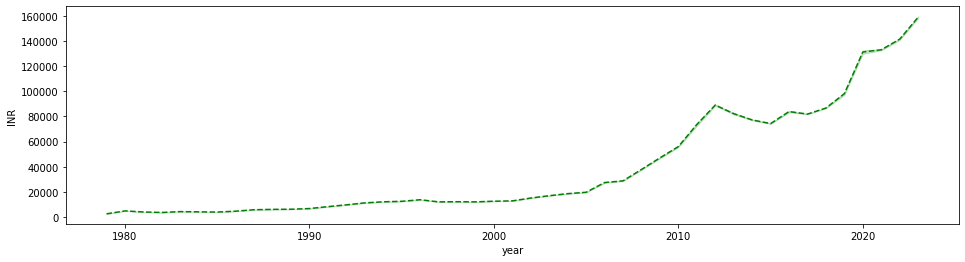

In [17]:
plt.subplots(figsize=(16,4))
sns.lineplot(data=df,x='year',y='INR',ls="--",color='green')
plt.show()

In [18]:
data = df[df['year']>2008]
data

,INR,year,month,day,week,quarter,weekday
Date,,,,,,,
2009-01-01,42152.4,2009,1,1,1,1,3
2009-01-02,42474.5,2009,1,2,1,1,4
2009-01-05,41488.6,2009,1,5,2,1,0
2009-01-06,41343.7,2009,1,6,2,1,1
2009-01-07,41419.5,2009,1,7,2,1,2
...,...,...,...,...,...,...,...
2023-07-17,159940.3,2023,7,17,29,3,0
2023-07-18,162067.1,2023,7,18,29,3,1
2023-07-19,162141.7,2023,7,19,29,3,2


In [19]:
data.isnull().sum()

INR        0
year       0
month      0
day        0
week       0
quarter    0
weekday    0
dtype: int64

In [20]:
def unique(data):
    for i in data.columns:
        print('Unique values in ',i,"-->",data[i].nunique())
        
unique(data)        

Unique values in  INR --> 3639
Unique values in  year --> 15
Unique values in  month --> 12
Unique values in  day --> 31
Unique values in  week --> 53
Unique values in  quarter --> 4
Unique values in  weekday --> 5


<Figure size 720x432 with 0 Axes>

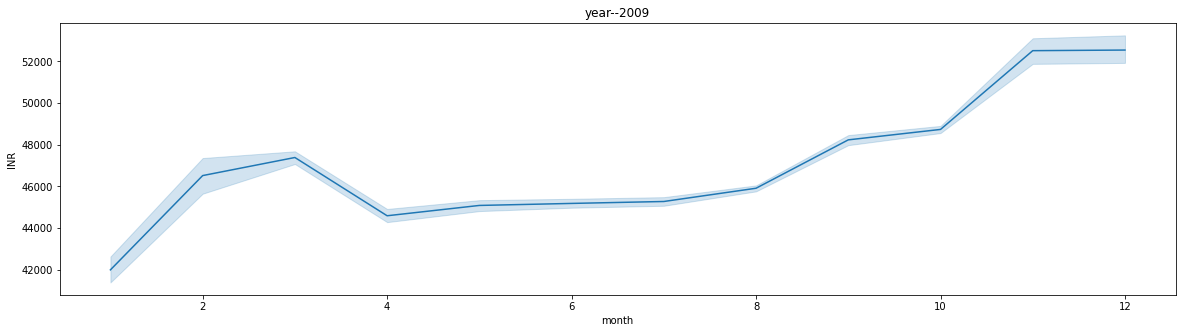

<Figure size 720x432 with 0 Axes>

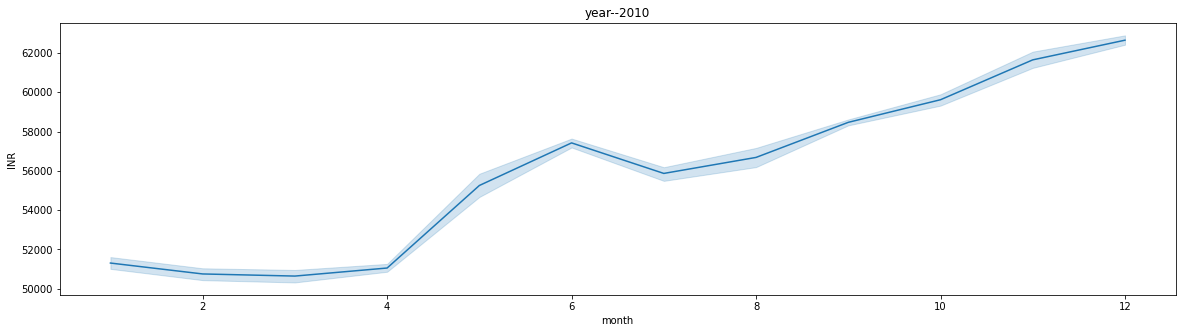

<Figure size 720x432 with 0 Axes>

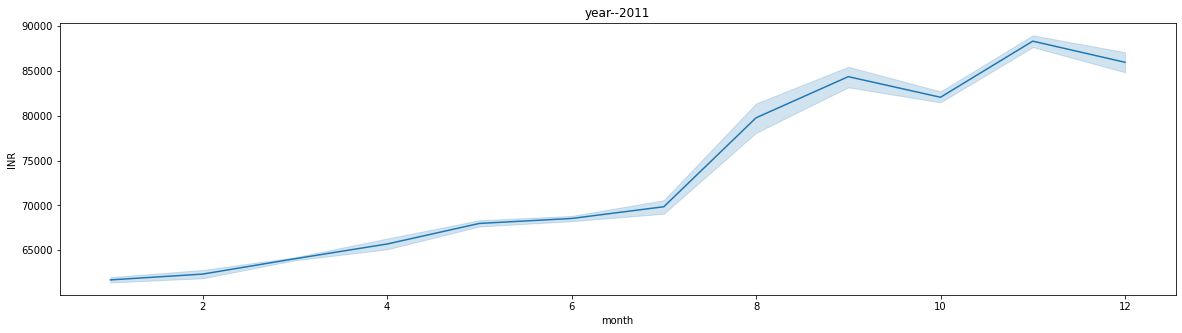

<Figure size 720x432 with 0 Axes>

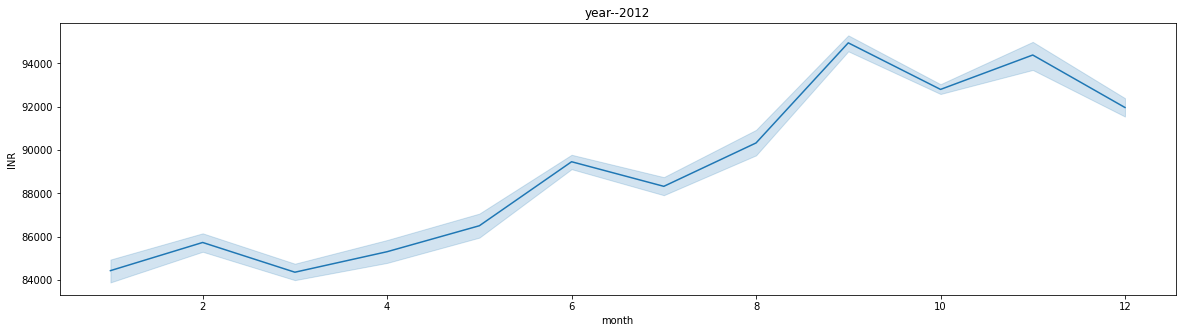

<Figure size 720x432 with 0 Axes>

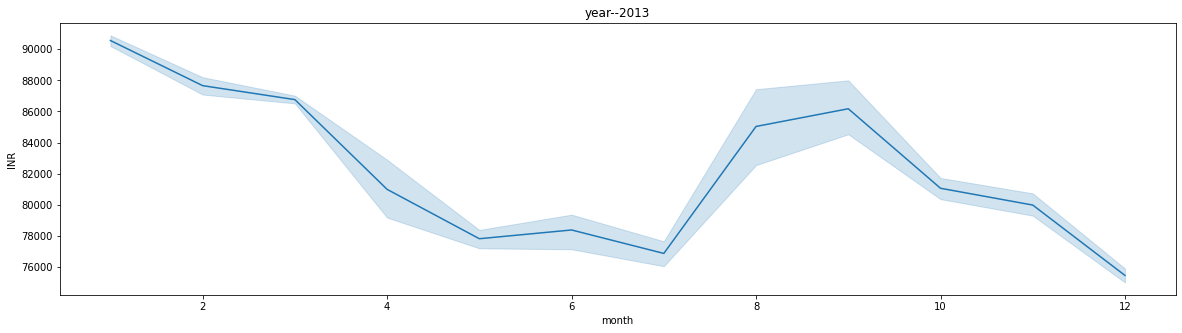

<Figure size 720x432 with 0 Axes>

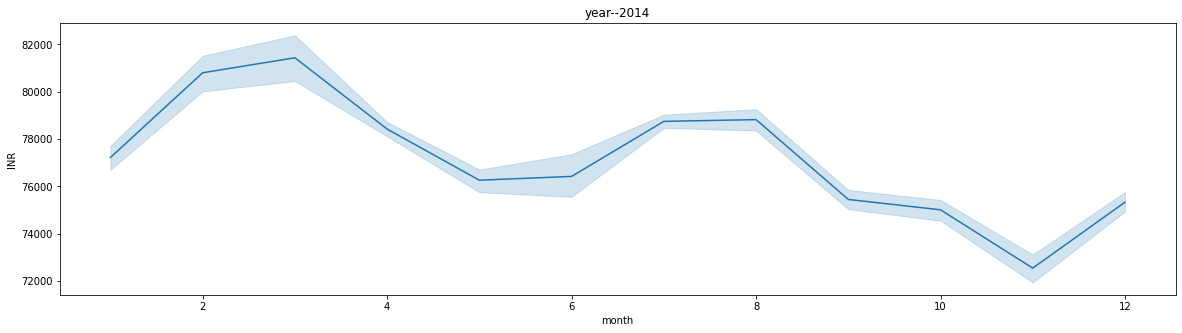

<Figure size 720x432 with 0 Axes>

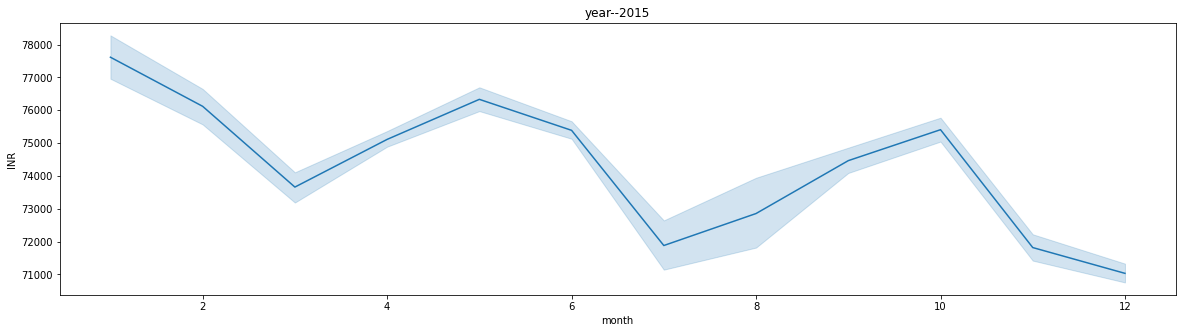

<Figure size 720x432 with 0 Axes>

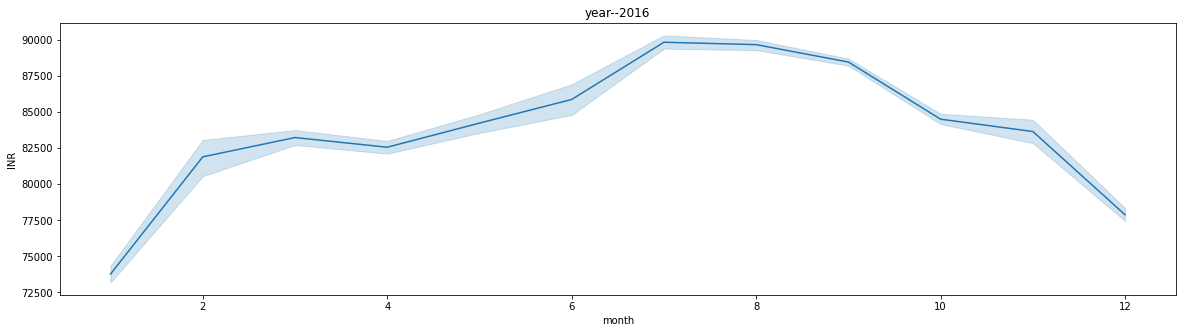

<Figure size 720x432 with 0 Axes>

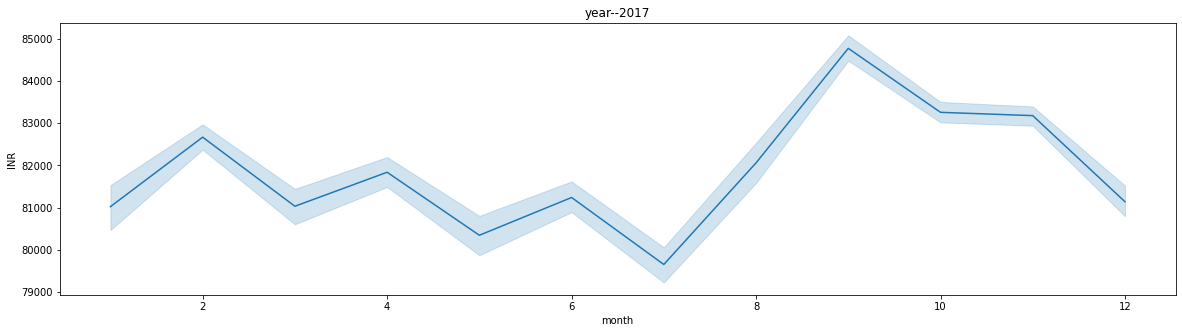

<Figure size 720x432 with 0 Axes>

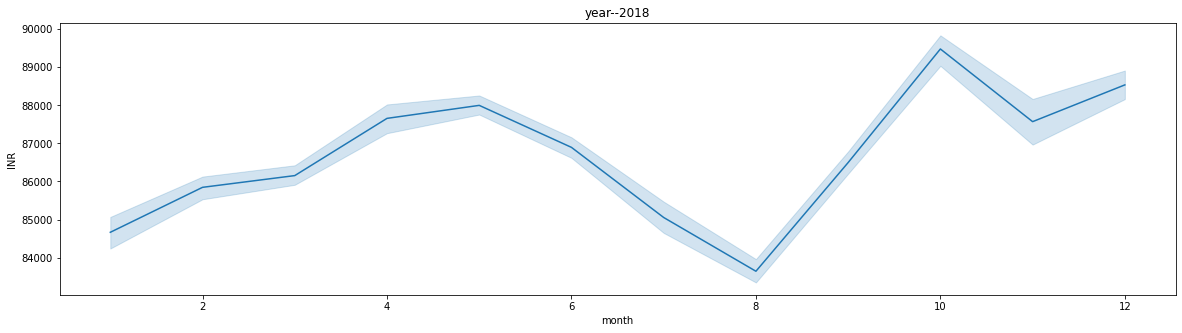

<Figure size 720x432 with 0 Axes>

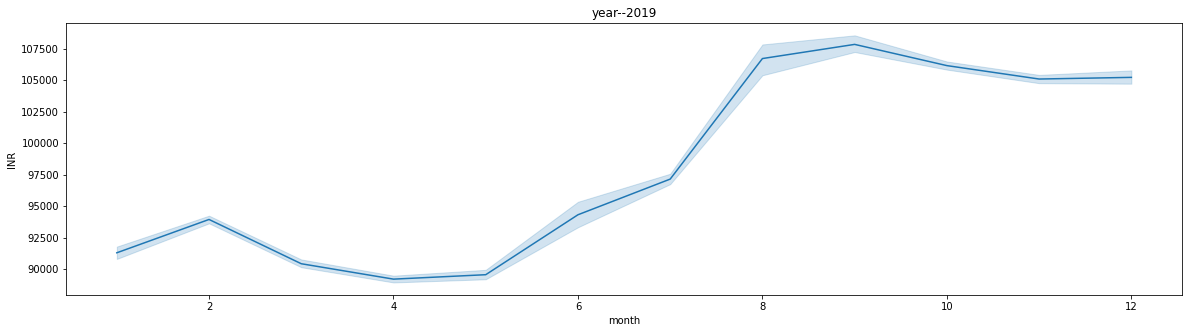

<Figure size 720x432 with 0 Axes>

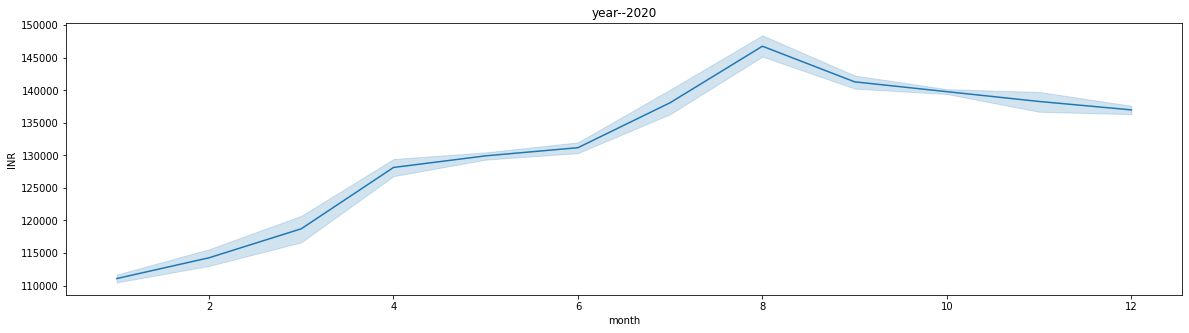

<Figure size 720x432 with 0 Axes>

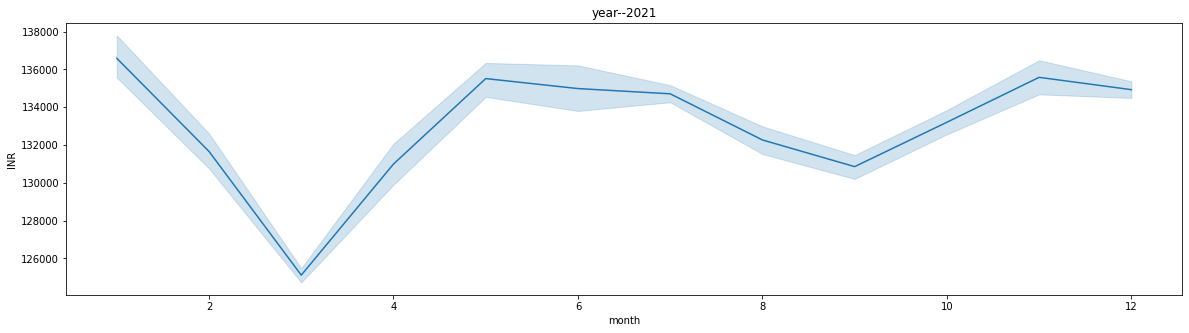

<Figure size 720x432 with 0 Axes>

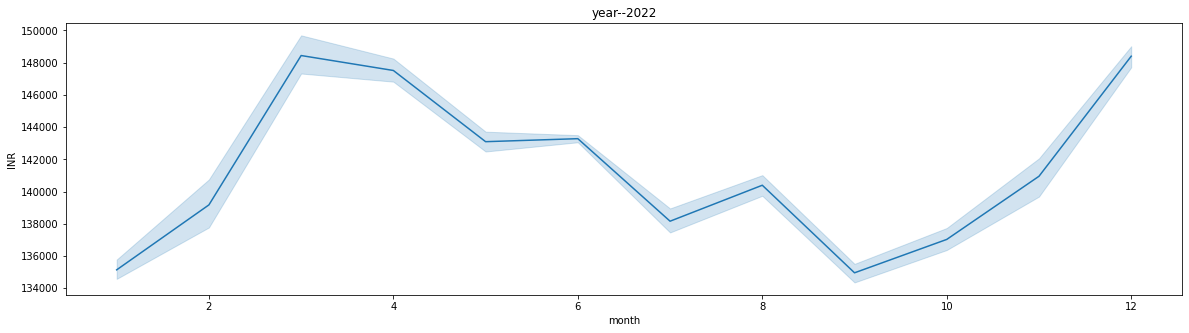

<Figure size 720x432 with 0 Axes>

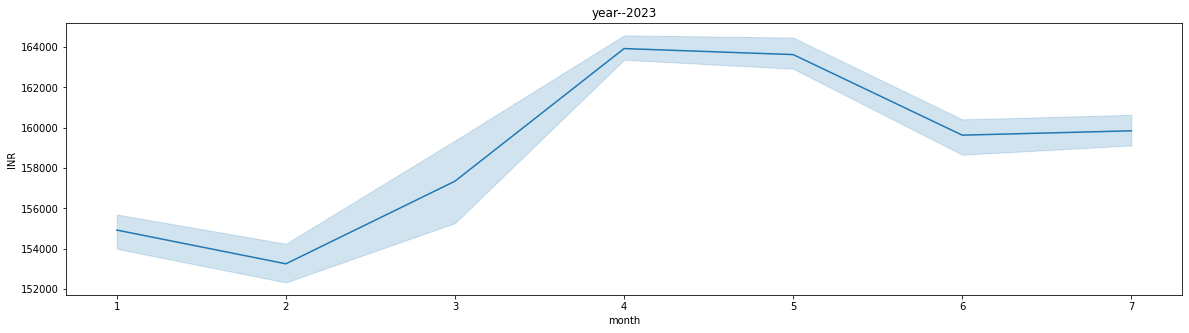

In [21]:
# function for each year

years = list(data['year'].value_counts().index.sort_values())
def yearly(x):
    plt.figure(figsize=(10, 6))  # Change size as needed

    newd=data[(data['year']==x)]
    plt.subplots(figsize = (20,5))

    sns.lineplot(data=newd,x=newd.month,ls='-',y=newd['INR'])
    plt.title(f'year--{x}')
    plt.show()
    
    
    
    
    
for i in years:
    yearly(i)

<Figure size 1152x432 with 0 Axes>

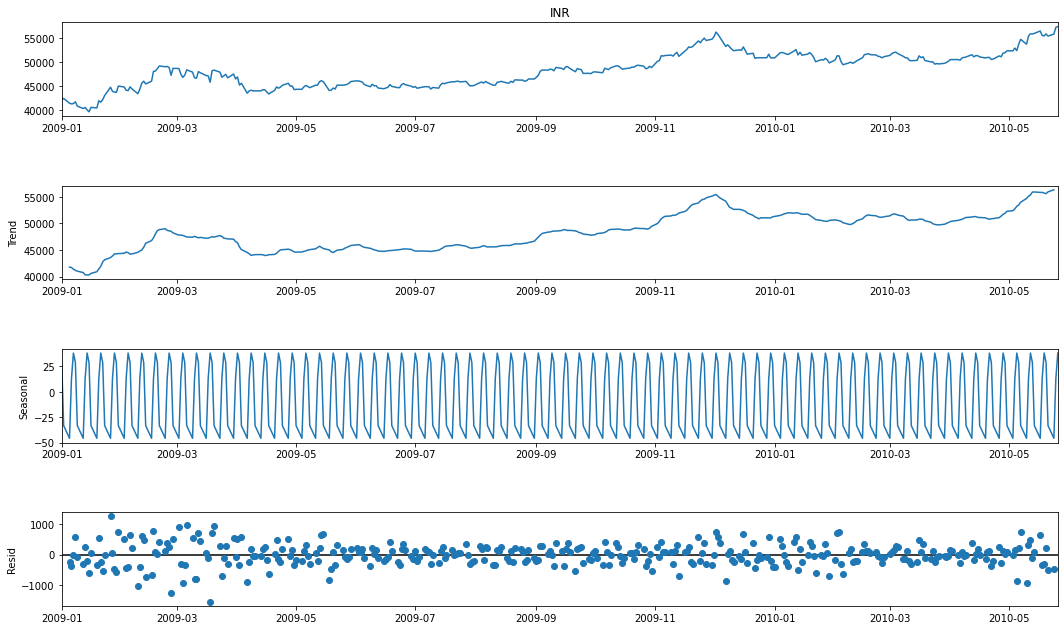

In [22]:
# decomposing a time series into trend, seasonal,residual
fig=plt.figure(figsize=((16,6)))
result=seasonal_decompose(data['INR'][:365])
fig=result.plot()
fig.set_size_inches(17,10)


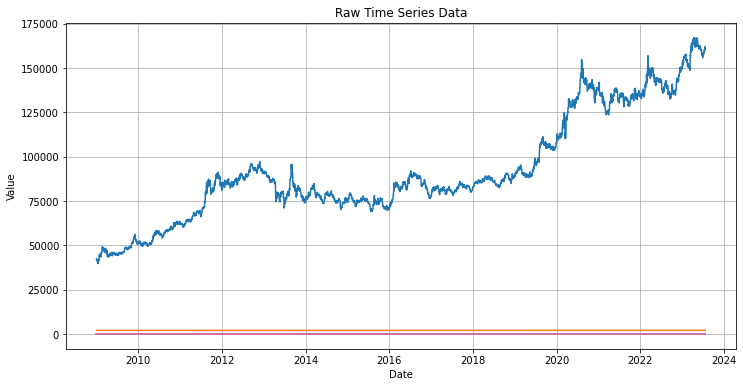

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Raw Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

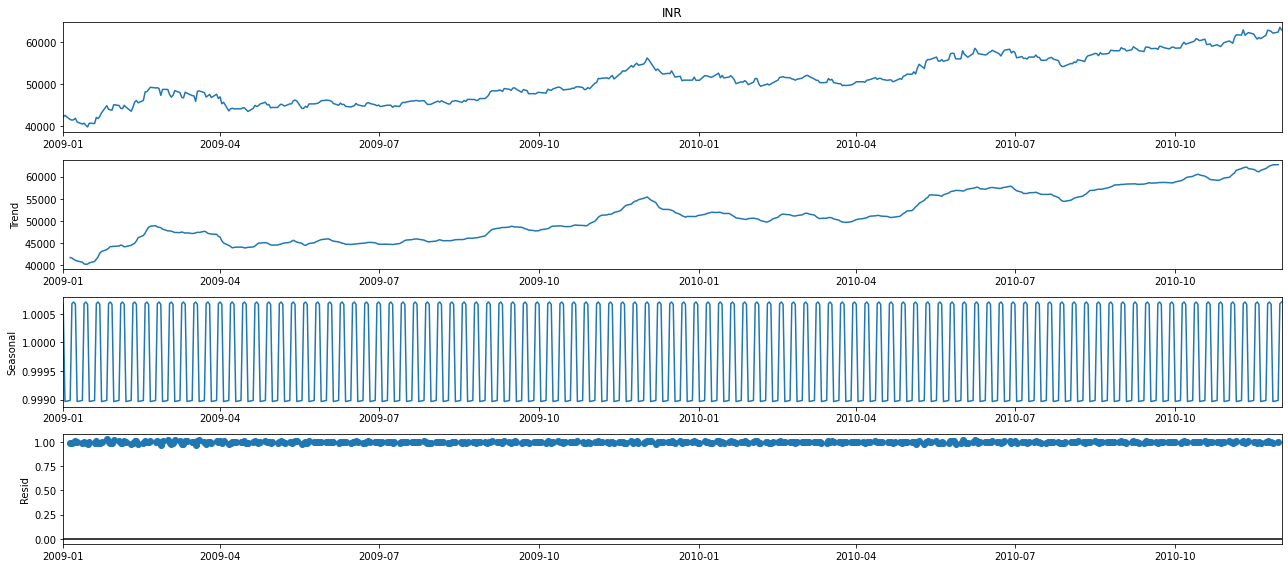

<Figure size 4000x1600 with 0 Axes>

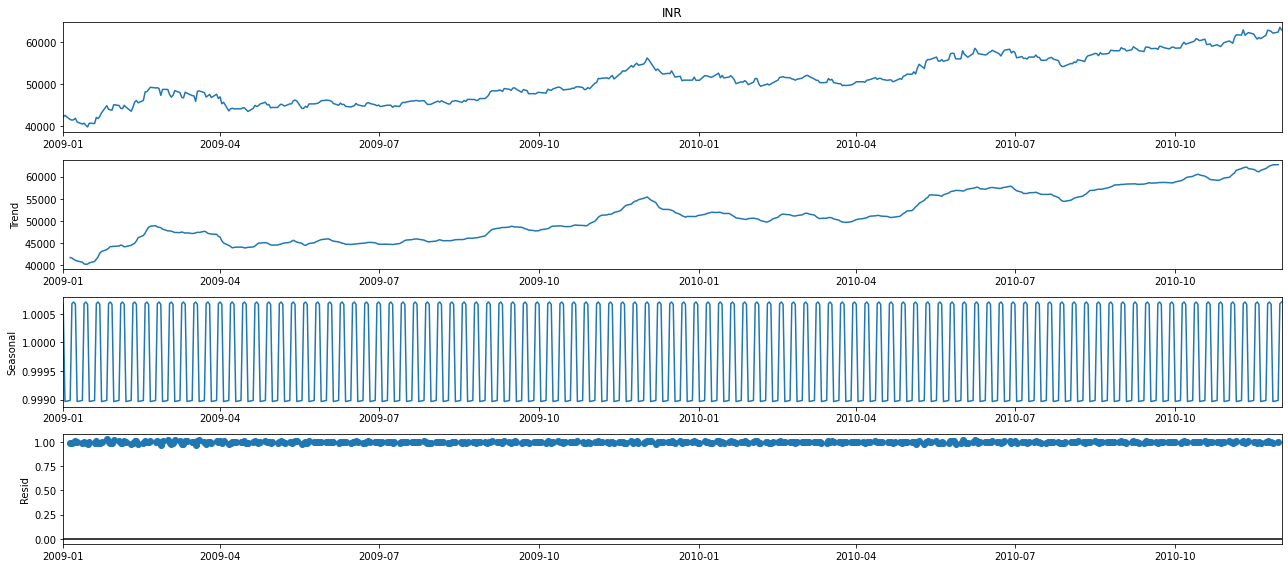

In [24]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = data.INR[:500]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

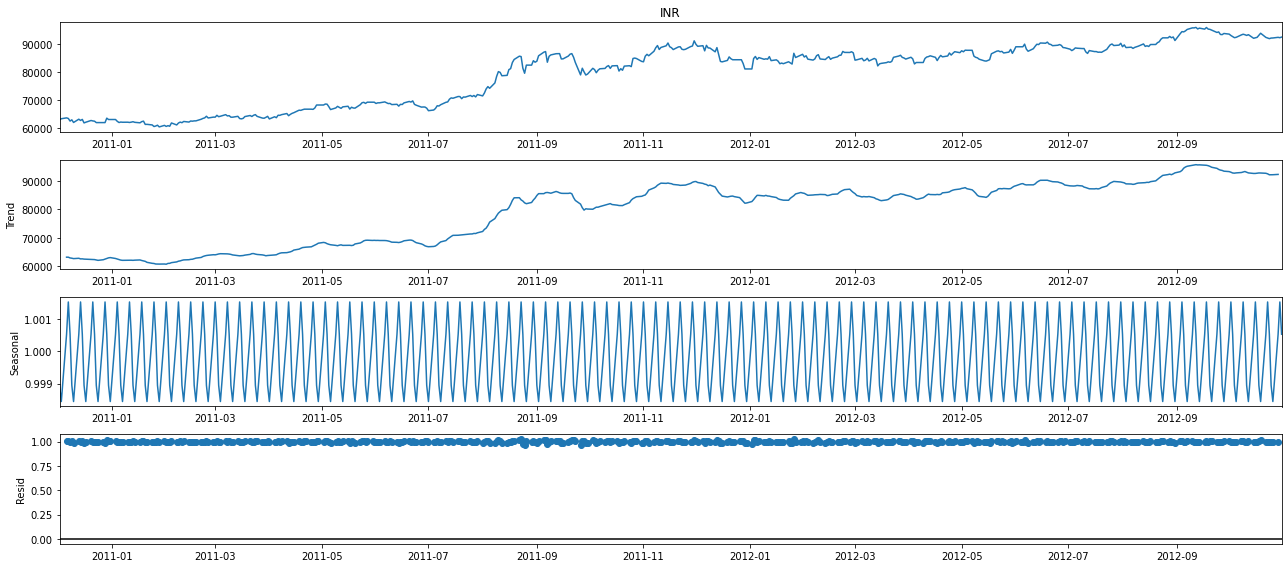

<Figure size 4000x1600 with 0 Axes>

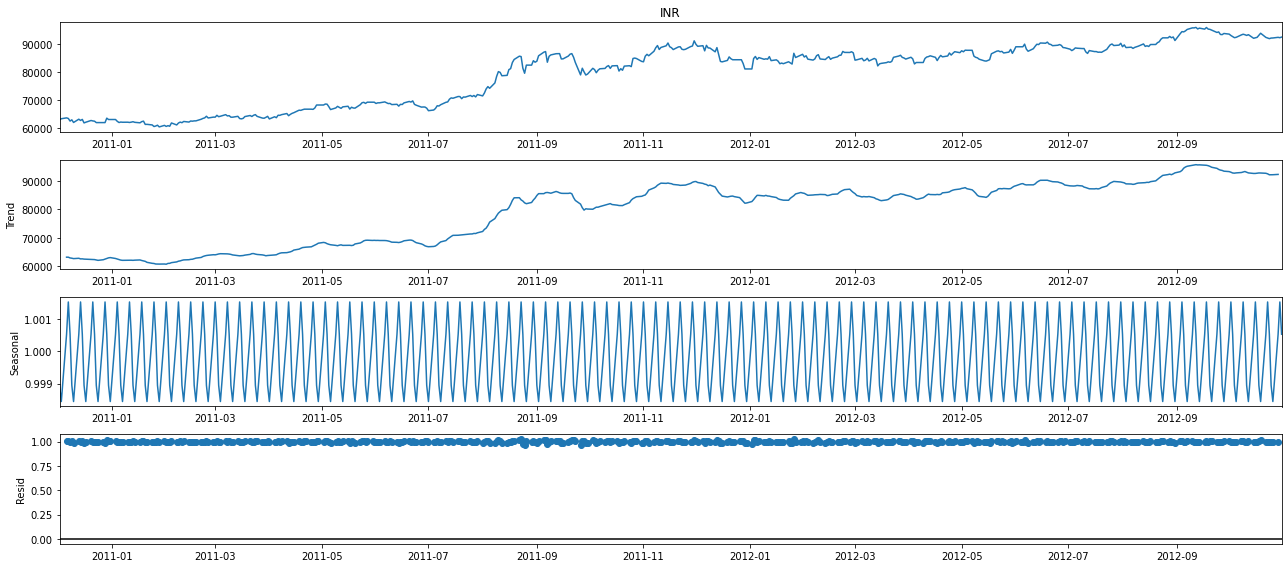

In [25]:
#rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = data.INR[500:1000]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

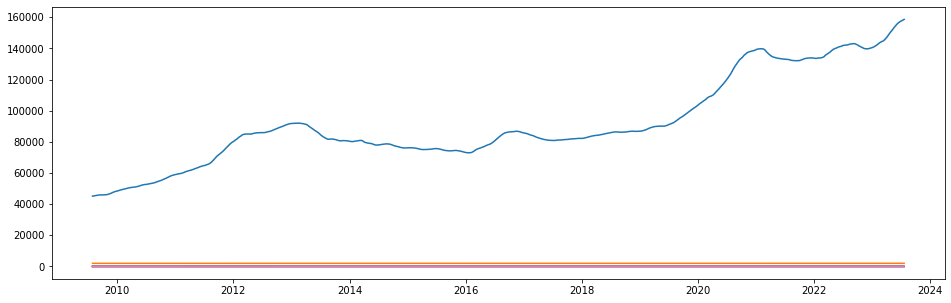

In [26]:
# Now we will check trend with automatic decompose, moving averages, std deviation
moving_avg = data.rolling(window=150).mean()

plt.figure(figsize=(16,5))
plt.plot(moving_avg,label='original data')
plt.show()


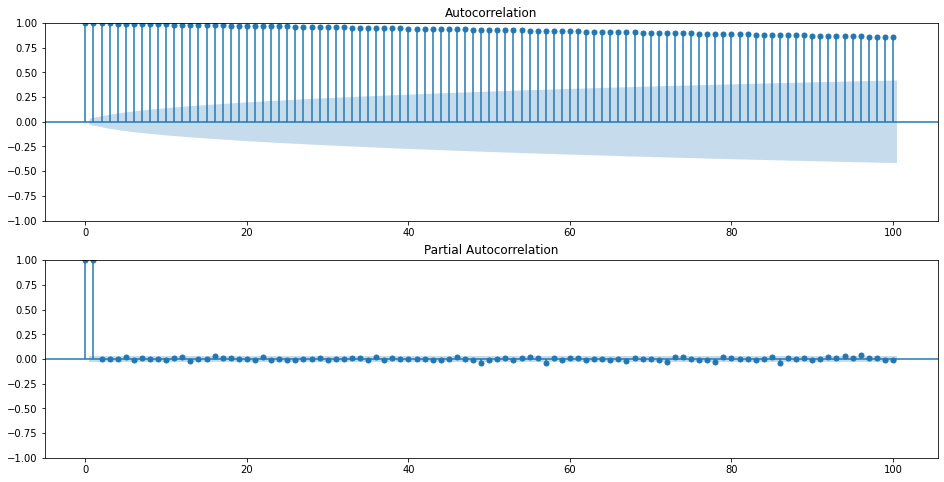

In [27]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(211)
fig=plot_acf(data['INR'],lags=100,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(data['INR'],lags=100,ax=ax2)

 We are having very good correlation at all log values in ACF and in pacf it is showing 1 as perfect correlation.
 Still we will check with different test and will do stationarity conversion using differencing technique.
 - This shows our time series is not stationary

# Lets check whether our Rolling mean and Std deviation is constant over the time series data

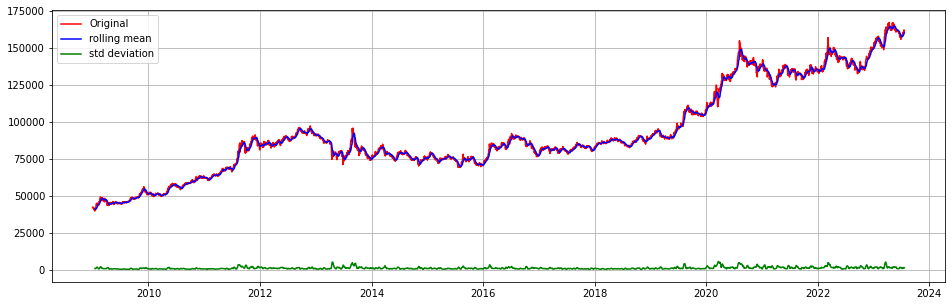

In [28]:
std_deviation = data.INR.rolling(window=12).std()
rolling_mean = data.INR.rolling(window=12).mean()
plt.figure(figsize=(16,5))
plt.plot(data['INR'],label='Original',color='red')
plt.plot(rolling_mean,label='rolling mean',color='blue')
plt.plot(std_deviation,label='std deviation',color='green')
plt.legend()
plt.grid('both')
plt.show()

Rolling Mean: If the rolling mean with a window of 12 is almost identical to the original data, it suggests that your data does not have a significant trend over short periods. This is often an indication that your data is relatively stationary, at least in terms of its mean. However, it's essential to look at longer trends in the data to confirm stationarity.

Rolling Standard Deviation: If the rolling standard deviation with windows of 12 or 200 is nearly flat around 0, it suggests that the variability or dispersion of your data does not change significantly over time. This could mean that your data is relatively homoscedastic (constant variance) or that any variability is negligible compared to the scale of the data.

# Lets check with ADF for more clearity on stationarity

In [29]:
adft = adfuller(data.INR.values)
print("stats value : ",adft[0])
print('P value :',adft[1])
print('critical value :')
for key, value in adft[4].items():
    print('\t%s: %.3f' % (key, value))

stats value :  -0.22886438049295016
P value : 0.9349924591130789
critical value :
	1%: -3.432
	5%: -2.862
	10%: -2.567


Since the p-value is not less than .05, we fail to reject the null hypothesis.

This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

We can't reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.
Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model. So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.

In [30]:
# will merge all above graphs here only

We will do differencing till our data can not con converted into stationarity.

In [31]:
diff_1 = data.diff(1)
diff_1

,INR,year,month,day,week,quarter,weekday
Date,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,322.1,0.0,0.0,1.0,0.0,0.0,1.0
2009-01-05,-985.9,0.0,0.0,3.0,1.0,0.0,-4.0
2009-01-06,-144.9,0.0,0.0,1.0,0.0,0.0,1.0
2009-01-07,75.8,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2023-07-17,-451.2,0.0,0.0,3.0,1.0,0.0,-4.0
2023-07-18,2126.8,0.0,0.0,1.0,0.0,0.0,1.0
2023-07-19,74.6,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
diff_1.dropna(inplace=True)
diff_1

,INR,year,month,day,week,quarter,weekday
Date,,,,,,,
2009-01-02,322.1,0.0,0.0,1.0,0.0,0.0,1.0
2009-01-05,-985.9,0.0,0.0,3.0,1.0,0.0,-4.0
2009-01-06,-144.9,0.0,0.0,1.0,0.0,0.0,1.0
2009-01-07,75.8,0.0,0.0,1.0,0.0,0.0,1.0
2009-01-08,353.9,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2023-07-17,-451.2,0.0,0.0,3.0,1.0,0.0,-4.0
2023-07-18,2126.8,0.0,0.0,1.0,0.0,0.0,1.0
2023-07-19,74.6,0.0,0.0,1.0,0.0,0.0,1.0


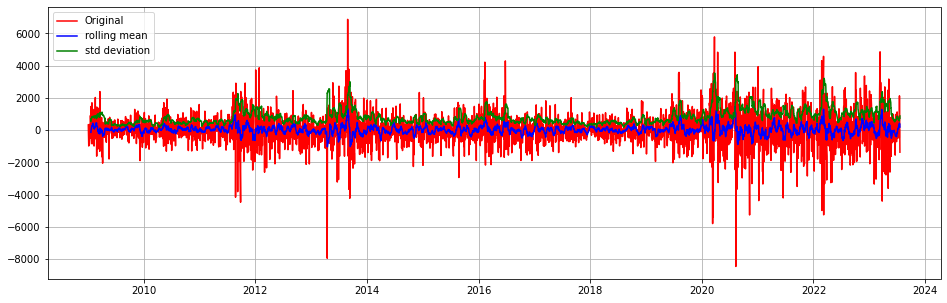

In [33]:
std_deviation = diff_1.INR.rolling(window=12).std()
rolling_mean = diff_1.INR.rolling(window=12).mean()
plt.figure(figsize=(16,5))
plt.plot(diff_1['INR'],label='Original',color='red')
plt.plot(rolling_mean,label='rolling mean',color='blue')
plt.plot(std_deviation,label='std deviation',color='green')
plt.legend()
plt.grid('both')
plt.show()

In [34]:
adft = adfuller(diff_1.INR.values)
print("stats value : ",adft[0])
print('P value :',adft[1])
print('critical value :')
for key, value in adft[4].items():
    print('\t%s: %.3f' % (key, value))

stats value :  -16.199689198613378
P value : 4.0895361389833677e-29
critical value :
	1%: -3.432
	5%: -2.862
	10%: -2.567


- Now we can reject the null hypothesis- our time series data is stationary now.
- We can go and check with ACF and PACF value now.

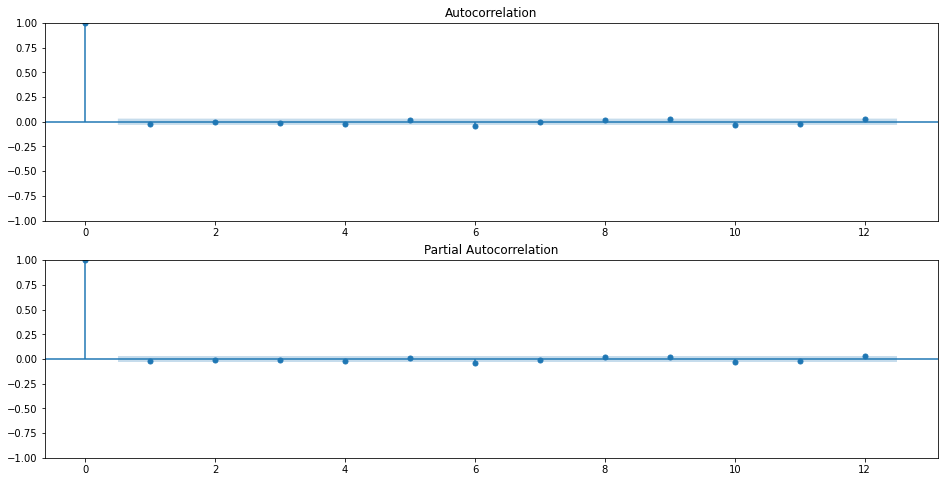

In [35]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(211)
fig=plot_acf(diff_1['INR'],lags=12,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(diff_1['INR'],lags=12,ax=ax2)

In summary, zero ACF and PACF values at lag 12 after differencing are common and generally indicate that the seasonal pattern has been effectively removed from the data. As long as the resulting differenced series is stationary and suitable for modeling, there is no need to be worried about this observation.

# Now we will proceed with Model building and time series forecasting

In [36]:
diff_1.drop(['month','year','day','week','quarter','weekday'],axis=1,inplace=True)


In [37]:
diff_1.isnull().sum()

INR    0
dtype: int64

In [38]:
trainsize=0.7
train,test = train_test_split(diff_1, train_size=trainsize,shuffle=False)
print(train)
print(test)

              INR
Date             
2009-01-02  322.1
2009-01-05 -985.9
2009-01-06 -144.9
2009-01-07   75.8
2009-01-08  353.9
...           ...
2019-03-05 -525.7
2019-03-06 -501.9
2019-03-07   -3.2
2019-03-08  634.3
2019-03-11 -545.6

[2657 rows x 1 columns]
               INR
Date              
2019-03-12    68.8
2019-03-13   633.0
2019-03-14 -1071.9
2019-03-15    38.9
2019-03-18  -250.6
...            ...
2023-07-17  -451.2
2023-07-18  2126.8
2023-07-19    74.6
2023-07-20    17.7
2023-07-21 -1370.6

[1139 rows x 1 columns]


In [39]:
train_data = train['INR'].to_numpy() # Select 'INR' column
print(train_data)

test_data = test['INR'].to_numpy() # Select 'INR' column
print(test_data)

[ 322.1 -985.9 -144.9 ...   -3.2  634.3 -545.6]
[   68.8   633.  -1071.9 ...    74.6    17.7 -1370.6]


In [40]:
# Lets train it on arima model
def arima_model(train,test,arima_order):
    history=[x for x in train]
    predictions=list()
    for t in range(len(test_data)):
        model = ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_data[t])
    # calculating rmse
    print(predictions)
    rmse = np.sqrt(mean_squared_error(test_data,predictions))
    plt.plot(test_data, color='green',label='Original')
    plt.plot(predictions, color='black', label='AR predicted')
    plt.legend()
    print(rmse)

[-545.5999999999912, 68.80000000000291, 633.0, -1071.9000000000087, 38.90000000000896, -250.60000000000582, 647.0, -596.5, 397.6000000000058, 681.5, 178.5, -139.40000000000876, -331.6999999999971, -897.1999999999971, 225.59999999999127, -277.0, -597.5999999999913, -580.6999999999971, 134.1999999999971, 653.3999999999942, 1336.6000000000058, -203.0, -11.10000000000582, -606.5, -60.19999999999709, -380.1999999999972, -466.6000000000058, -167.39999999999418, -8.499999999999972, 0.0, 0.0, -8.999999999999998, 464.0999999999913, 967.1000000000058, -349.8999999999942, -278.8000000000029, -121.19999999999712, 63.99999999999997, -1084.7000000000116, 184.60000000000582, 2.842170943040401e-14, 760.1999999999972, 424.90000000000873, 537.8999999999942, -8.39999999999418, 1290.899999999994, -113.30000000000291, -42.5, -581.8000000000029, -596.6999999999971, -971.8000000000029, -568.7999999999884, 259.79999999998836, 655.2000000000116, -458.5, 0.0, -11.5, 574.0999999999913, -147.5, 750.6000000000058,

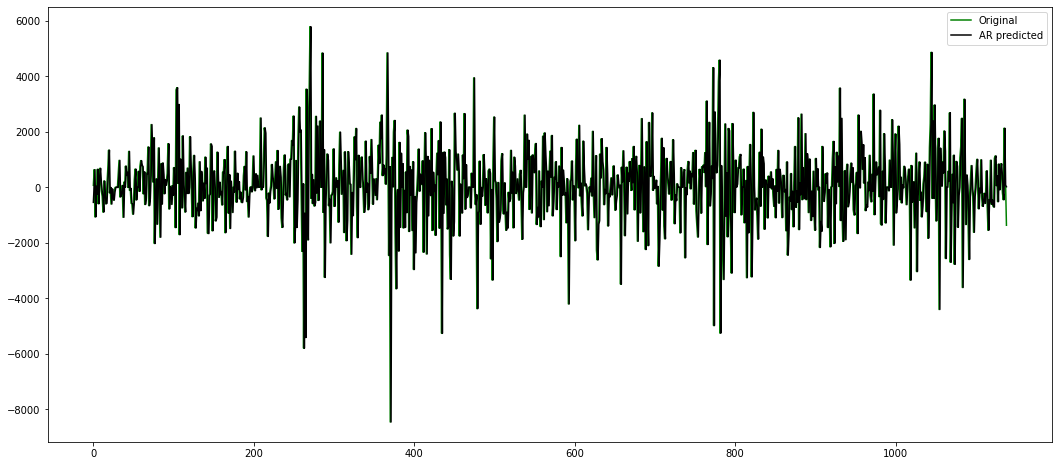

In [41]:
arima_order=(0,1,0)
arima_model(train_data,test_data,arima_order)
#print(f'RMSE : {rmse}')

In [42]:
# Hence we have seen the work of ARIMA lets forecast for 60 days and compare
history = [x for x in train_data]
model=ARIMA(history,order=(0,1,0))
model_fit = model.fit()
yhat = model_fit.summary()
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2657
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -22346.286
Date:                Sun, 17 Mar 2024   AIC                          44694.573
Time:                        17:32:49   BIC                          44700.457
Sample:                             0   HQIC                         44696.703
                               - 2657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.189e+06    1.7e+04     69.904      0.000    1.16e+06    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                 641.85   Jarque-Bera (JB):              3176.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

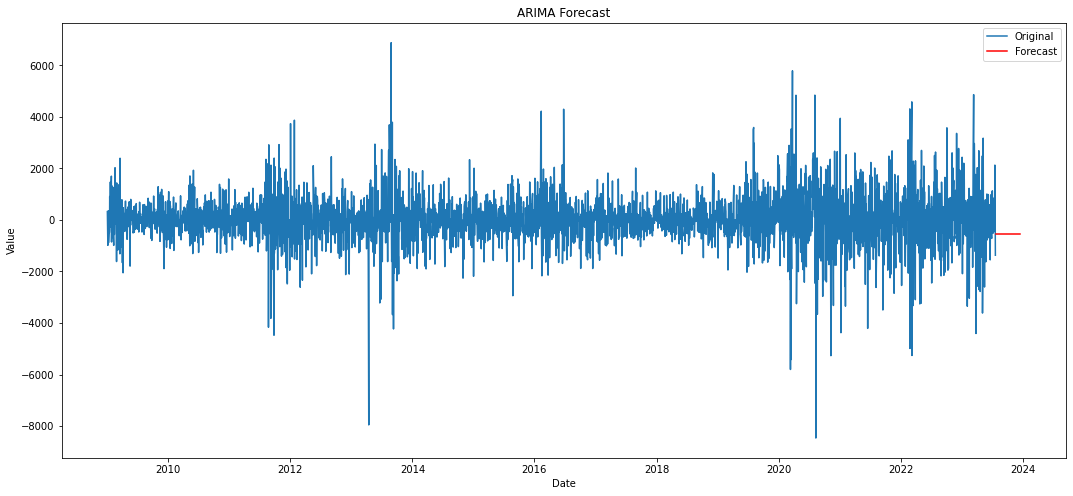

In [43]:
# Forecast future values for 60 days
forecast_values = model_fit.forecast(steps=150)

# Create a time index for the forecasted values (e.g., next 60 days)
# Example: If the last date in your original data is '2022-12-31', create a time index for the next 60 days
forecast_dates = pd.date_range(start='2023-7-22', periods=150)

# Plot original values
plt.plot(diff_1.index, diff_1['INR'], label='Original')

# Plot forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()

# SARIMAX

In [46]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit SARIMA model to the training data
model = sm.tsa.statespace.SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(1, 1, 1, 3))
model_fit = model.fit()

# Forecast future values for the entire test set
forecast_values = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print("RMSE:", rmse)


RMSE: 1497.082055537108


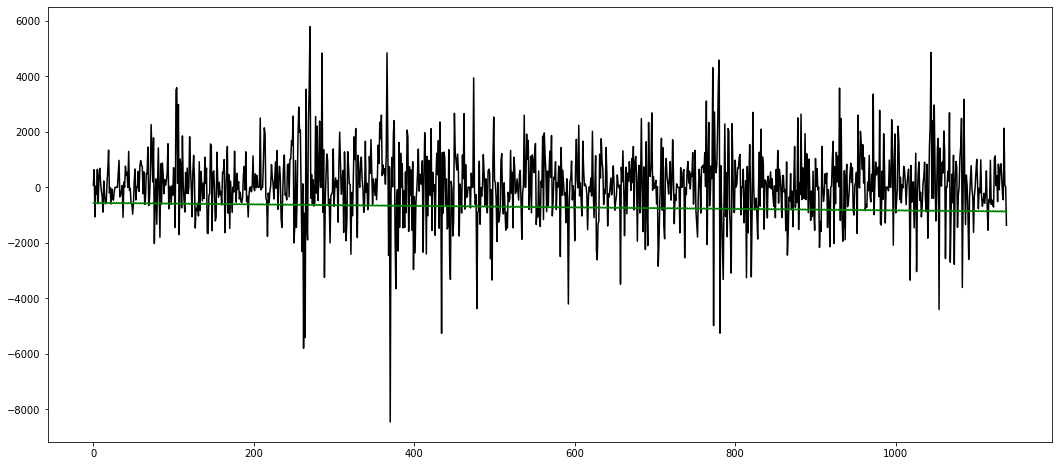

In [48]:
plt.plot(test_data,color='black',label='original')
plt.plot(forecast_values,color='green',label='forecasted values')
plt.show()

In [58]:
forecast_values.min()

-883.4631738481506

In [59]:
forecast_values.max()

-546.9506001278564

In [60]:
test_data.min()

-8461.599999999977

In [61]:
test_data.max()

5785.0

If the visual representation of the forecasted values appears flat below zero when compared to the test dataset, it suggests that the model may not be accurately capturing the patterns or dynamics of the data. Here are some steps you can take to address this issue and improve the accuracy of your forecasts:

Model Selection: Revisit the choice of SARIMA model parameters (e.g., order and seasonal order) and consider whether they adequately capture the underlying patterns in the data. Experiment with different parameter configurations to find the best-fitting model.

Data Preprocessing: Ensure that the data preprocessing steps are appropriate for the modeling task. Consider techniques such as differencing, transformation, or outlier removal to make the data more amenable to modeling.

Model Evaluation: Evaluate the performance of the SARIMA model using additional diagnostic tools such as residual analysis, autocorrelation plots, and out-of-sample forecasting accuracy metrics. Identify any systematic errors or patterns in the model residuals that may indicate areas for improvement.

Feature Engineering: Explore the possibility of incorporating additional features or external variables that may improve the model's predictive performance. For example, economic indicators, weather data, or holiday information could provide valuable information for forecasting certain time series.

Ensemble Methods: Consider using ensemble methods such as model averaging or stacking to combine the predictions of multiple SARIMA models or different forecasting techniques. Ensemble methods can often lead to more robust and accurate forecasts by leveraging the strengths of individual models.

Hyperparameter Tuning: Fine-tune the hyperparameters of the SARIMA model, such as optimization algorithms, learning rates, and regularization parameters, to improve convergence and overall model performance.

Model Comparison: Compare the SARIMA model with alternative forecasting methods, such as machine learning algorithms (e.g., LSTM, Random Forests) or exponential smoothing methods, to determine whether a different approach may yield better results for your dataset.

Domain Expertise: Incorporate domain expertise and domain-specific knowledge into the modeling process to ensure that the forecasts align with the underlying dynamics and behavior of the time series data.

By carefully evaluating and adjusting the SARIMA model and considering alternative modeling approaches, you can work towards improving the accuracy of your forecasts and achieving better alignment with the test dataset's patterns and dynamics.